In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import numpy as np

In [2]:
"""
master_input.parquet
master_output.parquet
play_level.parquet
player_analysis.parquet
spatial_features.parquet
supplementary.parquet
trajectories.parquet
"""
base_dir = "../consolidated_data/"

In [3]:
game_id = '2023090700'
play_id = '1679'
nfl_id = '46243'
player_keys = ['game_id', 'play_id', 'nfl_id']
player_dtls = ['player_name', 'player_height', 'player_weight', 'player_birth_date', 'player_position', 'player_side', 'player_role', 'num_frames_output']
player_mvmt = ['frame_id', 'x', 'y']
input_cols = player_keys + player_dtls + player_mvmt + ['player_to_predict', 'play_direction', 'absolute_yardline_number', 's', 'a', 'dir', 'o', 'num_frames_output', 'ball_land_x', 'ball_land_y', 'week']
input_df = pd.read_parquet(f'{base_dir}/master_input.parquet')

In [4]:
game_id = '2023090700'
play_id = '1679'
nfl_id = '46243'
output_cols = player_keys + player_mvmt
output_df = pd.read_parquet(f'{base_dir}/master_output.parquet')

In [5]:
output_xdf = pd.merge(
    output_df[output_cols], 
    input_df[player_keys + player_dtls].drop_duplicates(), 
    on=player_keys, 
    how='left'
)

41325
44822
44888
44906
46213
46243
47888
53591
53953
54519
54562
54653
55910


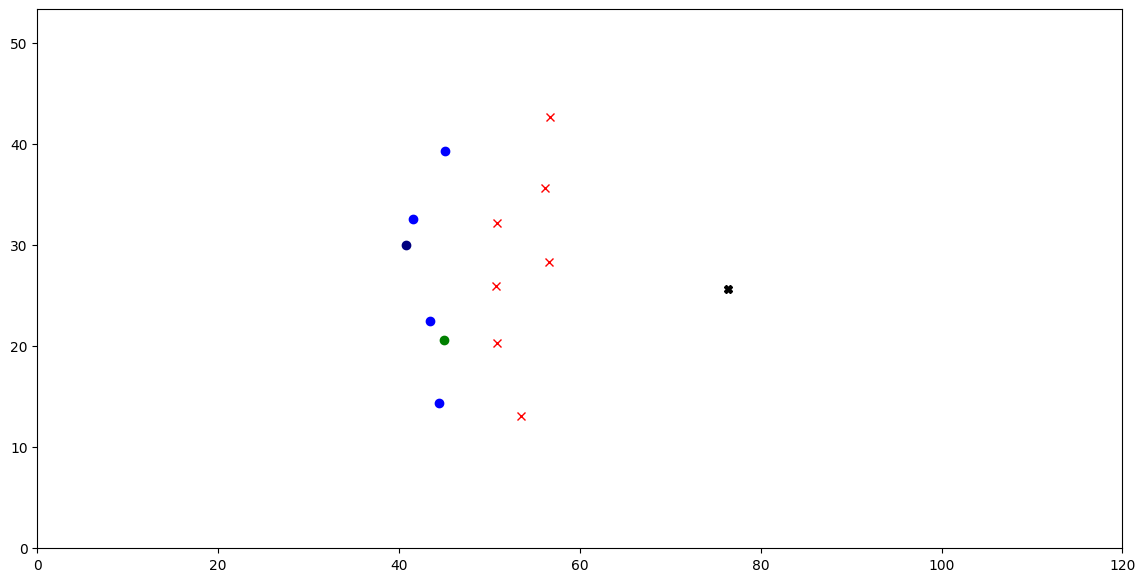

In [6]:
%matplotlib inline

fmt = {
    "Defensive Coverage": ['red', 'x'],
    "Other Route Runner": ['blue', 'o'],
    "Passer": ['navy', 'o'],
    "Targeted Receiver": ['green', 'o'],
    "Ball": ['black', 'X']
}

mfmt = {
    "Defensive Coverage": ['red', '-'],
    "Other Route Runner": ['blue', '-'],
    "Passer": ['navy', '-'],
    "Targeted Receiver": ['green', '-']
}

ball = "Ball"

play_df = input_df.query(f"game_id == {game_id} and play_id == {play_id}")

fig, ax = plt.subplots(figsize=(14,7))
ax.set(xlim=[0, 120], ylim=[0, 53.3])

frames = [x for x in range(play_df['frame_id'].max())]

# plot ball position
ax.plot(
    play_df['ball_land_x'].iloc[0], 
    play_df['ball_land_y'].iloc[0], 
    color=fmt[ball][0],
    marker=fmt[ball][1]
)

# plot starting positions
grouped = play_df.groupby('nfl_id')

artists = {}
for player_id, player_df in grouped:
    print(player_id)
    ax.plot(
        player_df['x'].iloc[0], 
        player_df['y'].iloc[0], 
        color=fmt[player_df['player_role'].iloc[0]][0],
        marker=fmt[player_df['player_role'].iloc[0]][1],
    )

def init():
    grouped = play_df.groupby('nfl_id')
    for player_id, player_df in grouped:
        artists[player_id] = ax.plot(
            player_df['x'].iloc[0], 
            player_df['y'].iloc[0], 
            color=mfmt[player_df['player_role'].iloc[0]][0],
            linestyle=mfmt[player_df['player_role'].iloc[0]][1],
        )[0]
    return list(artists.values())

    
def update(frame):
    for player_id, player_df in grouped:
        artists[player_id].set_data(player_df['x'].iloc[:frame+1], player_df['y'].iloc[:frame+1])
        artists[player_id].set_color(mfmt[player_df['player_role'].iloc[0]][0])
        artists[player_id].set_linestyle(mfmt[player_df['player_role'].iloc[0]][1])
    return list(artists.values())

ani = animation.FuncAnimation(fig=fig, func=update, init_func=init, frames=frames, interval=100, blit=True, repeat=False)
plt.show()

In [7]:
play_df['frame_id'].max()

np.int64(31)

In [8]:
oplay_df = output_xdf.query(f"game_id == {game_id} and play_id == {play_id}")

oplay_df['frame_id'].max()

np.int64(18)

In [15]:
# pd.concat([play_df[output_xdf.columns], oplay_df]).sort_values(by=['nfl_id', 'frame_id']).query("nfl_id == 44888").head(40)
oplay_df.loc[:, ('frame_id')] = oplay_df['frame_id'] + play_df['frame_id'].max()

In [19]:
pd.concat([play_df[oplay_df.columns], oplay_df]).sort_values(by=['nfl_id', 'frame_id']).query("nfl_id == 44888").head(40)

,game_id,play_id,nfl_id,frame_id,x,y,player_name,player_height,player_weight,player_birth_date,player_position,player_side,player_role,num_frames_output
7552,2023090700,1679,44888,1,50.85,32.14,Alex Anzalone,6-3,240,1994-09-22,OLB,Defense,Defensive Coverage,18
7553,2023090700,1679,44888,2,50.86,32.15,Alex Anzalone,6-3,240,1994-09-22,OLB,Defense,Defensive Coverage,18
7554,2023090700,1679,44888,3,50.88,32.18,Alex Anzalone,6-3,240,1994-09-22,OLB,Defense,Defensive Coverage,18
7555,2023090700,1679,44888,4,50.91,32.23,Alex Anzalone,6-3,240,1994-09-22,OLB,Defense,Defensive Coverage,18
7556,2023090700,1679,44888,5,50.95,32.30,Alex Anzalone,6-3,240,1994-09-22,OLB,Defense,Defensive Coverage,18
7557,2023090700,1679,44888,6,51.00,32.39,Alex Anzalone,6-3,240,1994-09-22,OLB,Defense,Defensive Coverage,18
7558,2023090700,1679,44888,7,51.06,32.49,Alex Anzalone,6-3,240,1994-09-22,OLB,Defense,Defensive Coverage,18
7559,2023090700,1679,44888,8,51.14,32.61,Alex Anzalone,6-3,240,1994-09-22,OLB,Defense,Defensive Coverage,18
7560,2023090700,1679,44888,9,51.24,32.75,Alex Anzalone,6-3,240,1994-09-22,OLB,Defense,Defensive Coverage,18
7561,2023090700,1679,44888,10,51.37,32.91,Alex Anzalone,6-3,240,1994-09-22,OLB,Defense,Defensive Coverage,18
